In [1]:
#Opened with --pylab flag
#Need to create code to analyze piot data
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

In [2]:
# Change this depending on computer used for analysis
## Laptop
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData'
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData/test3s'
#filepath = '/Users/frankkanayet/Google Drive/NLineData/Beh_Data'

## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data'
os.chdir(filepath)

In [3]:
print 'Pandas version ' + pd.__version__

Pandas version 0.16.2


In [4]:
filenames = glob.glob('Nline_*.mat')
print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
data_dict.keys()

['Nline_02001-Mar1615.mat', 'Nline_02002-Mar1915.mat', 'Nline_02003-Mar2015a.mat', 'Nline_02004-Mar2315a.mat', 'Nline_02005-Mar2315a.mat', 'Nline_02006-Mar2315a.mat', 'Nline_02007-Mar2415a.mat', 'Nline_02009-Mar2615a.mat', 'Nline_02010-Mar2615a.mat', 'Nline_02011-Mar2615a.mat', 'Nline_02012-Apr0215a.mat', 'Nline_02014-Apr0315a.mat', 'Nline_02015Apr2715a.mat', 'Nline_02016-Apr2715a.mat', 'Nline_02017-Apr2815a.mat', 'Nline_02018-Apr2815a.mat', 'Nline_02019-Apr2915a.mat', 'Nline_02020-May1815a.mat', 'Nline_02021-May2515a.mat', 'Nline_02022-May2515a.mat', 'Nline_02023-May2715a.mat', 'Nline_02024-May2815a.mat', 'Nline_02027-Jun0115a.mat']


['s_02009',
 's_02003',
 's_02002',
 's_02001',
 's_02007',
 's_02006',
 's_02005',
 's_02004',
 's_02018',
 's_02019',
 's_02010',
 's_02011',
 's_02012',
 's_02014',
 's_02015',
 's_02016',
 's_02017',
 's_02024',
 's_02027',
 's_02021',
 's_02020',
 's_02023',
 's_02022']

In [5]:
sub_ex = data_dict.keys()[0]

In [6]:
#data_dict['s_00011']['p']

In [7]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [8]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][0][5][0][0]
len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

49

In [9]:
data_dict[sub_ex]['p'].dtype.names

('ramp_up',
 'Mean_ITI',
 'Mean_hold',
 'decision',
 'consider',
 'runs',
 'nStim',
 'ntasks',
 'tasks',
 'trialSecs',
 'lineLength',
 'speed',
 'run_order',
 'NlineResults',
 'time_Runs',
 'task_transition',
 'start_Nline',
 'finish_Nline')

In [10]:
#Comment this out for include all subjects
#data_dict.pop('s_02012')
#data_dict.pop('s_02001')
#data_dict.pop('s_02002')
#data_dict.pop('s_02019')
#data_dict.pop('s_02017')
del data_dict['s_02012']
del data_dict['s_02017']
del data_dict['s_02019']
del data_dict['s_02001']
del data_dict['s_02002']

In [11]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [12]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'Run_'+str(run)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [13]:
#new_dat[sub_ex]['NlineResults']['Run_1'].keys()

In [14]:
#new_dat[sub_ex]['NlineResults']['Run_1']['Probe']

In [15]:
#new_dat[sub_ex]['NlineResults']['Run_1']['catch_probe']

In [16]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['Run_0'].keys())

In [17]:
#indexes[90]

In [18]:
#indexes[1][1]

In [19]:
varnames = new_dat[sub_ex][Nline]['Run_0'].keys()
#varnames[24]

In [20]:
#len(indexes)

In [21]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        else:
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
    Dic_list.append(temp_dict)

In [22]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
sum(nline_df.loc[sub_ex].loc['Run_0'].iloc[0:48]['catch'])

12

In [23]:
#nline_df.loc[sub_ex].loc['Run_0'].iloc[0:10]['Error']

In [24]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
#nline_df.index.names

In [25]:
test = nline_df['Probe']
for i in range(0,len(test)):
    test[i] = np.ravel(test[i])
    test[i] = test[i][0]
nline_df['Probe'] = test
nline_df['Probe']

/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Subject  Run    Trial
s_02009  Run_3  0        -44
                1         80
                2        -10
                3         14
                4         48
                5        -86
                6         54
                7        -94
                8        -58
                9         30
                10       -34
                11        70
                12       -78
                13        20
                14       -28
                15        96
                16        if
                17        or
                18        ox
                19        of
                20        we
                21        as
                22        do
                23        it
                24        am
                25        so
                26        is
                27        be
                28        by
                29        my
                        ... 
s_02022  Run_0  18        is
                19        my
                20   

### Create Stim Labels

In [26]:
#now nline
#nline_df['Num'] = nline_df['Num'].map('{:.0f}'.format)
#nline_df['Denom'] = nline_df['Denom'].map('{:.0f}'.format)
#nline_df['Stim'] = nline_df['Num']+'/'+nline_df['Denom']
#nline_df['Stim']

In [27]:
nline_df.columns

Index([           u'BadPress',               u'Block',               u'Click',
                   u'Correct',               u'Error',           u'ITI_onset',
            u'ITI_onset_real',            u'Line_pct',                u'Move',
                    u'Points',               u'Probe',                  u'RT',
                    u'RTHold',            u'Response',                u'Slow',
                      u'Task',               u'TestX',               u'Trial',
                     u'Wrong',               u'catch',         u'catch_probe',
            u'consider_onset', u'consider_onset_real',        u'decision_end',
         u'decision_end_real',      u'decision_onset', u'decision_onset_real',
                      u'hold',          u'hold_onset',     u'hold_onset_real',
                       u'iti',           u'mouse_pos'],
      dtype='object')

# Number Line Analyses

### Accuracy & RT

In [28]:
#nline_df['catch'].sum()

In [29]:
nline_no_miss = nline_df[['Error', 'RT', 'RTHold', 'catch']]
nline_no_miss = nline_no_miss[nline_no_miss['catch']<1]
#len(nline_no_miss)

In [30]:
nline_no_miss = nline_no_miss.replace(-1, np.nan)
nline_no_miss.pop('catch')

Subject  Run    Trial
s_02009  Run_3  1        0
                2        0
                3        0
                5        0
                6        0
                7        0
                8        0
                9        0
                11       0
                12       0
                13       0
                15       0
                17       0
                18       0
                19       0
                20       0
                21       0
                22       0
                24       0
                26       0
                27       0
                29       0
                30       0
                31       0
                32       0
                34       0
                35       0
                37       0
                38       0
                39       0
                        ..
s_02022  Run_0  8        0
                9        0
                10       0
                11       0
                14       0
      

In [31]:
nline_no_miss['Missed'] = nline_no_miss['Error']
nline_no_miss['Missed'][nline_no_miss['Missed']<1] = 0
nline_missed = nline_no_miss['Missed']
#nline_missed

In [32]:
nline_no_miss = nline_no_miss[nline_no_miss['Error']<1]
nline_no_miss['AbsError'] = np.abs(nline_no_miss['Error'])
#nline_no_miss

## How many trials missed?

In [33]:
nline_missed_subj = nline_missed.groupby(level=0)
nline_missed_subj.sum()

Subject
s_02003     7
s_02004     3
s_02005    17
s_02006     2
s_02007     1
s_02009     1
s_02010     7
s_02011     7
s_02014     7
s_02015     6
s_02016    10
s_02018     4
s_02020    12
s_02021     5
s_02022    18
s_02023     5
s_02024    10
s_02027     6
Name: Missed, dtype: float64

##Subject Averages

In [34]:
nline_no_miss_subj = nline_no_miss.groupby(level=0)
nline_no_miss_subj.mean()

,Error,RT,RTHold,Missed,AbsError
Subject,,,,,
s_02003,0.002544,2.240014,0.480898,0,0.022472
s_02004,0.000621,2.181841,0.390107,0,0.020997
s_02005,-0.004826,2.378822,0.468106,0,0.021902
s_02006,-0.000487,1.970216,0.422093,0,0.026771
s_02007,-0.009034,2.117213,0.430258,0,0.027687
s_02009,-0.003768,2.240575,0.499304,0,0.019800
s_02010,-0.003834,1.801020,0.402272,0,0.034298
s_02011,0.005220,2.177101,0.512704,0,0.031181
s_02014,0.000828,2.200079,0.485166,0,0.033909


##Overall Averages

In [35]:
np.mean(nline_no_miss_subj.mean())

Error      -0.001894
RT          2.155551
RTHold      0.475796
Missed      0.000000
AbsError    0.026046
dtype: float64

##Subject Standard Deviations

In [36]:
nline_no_miss_subj.std()

,Error,RT,RTHold,Missed,AbsError
Subject,,,,,
s_02003,0.031955,0.366943,0.082894,0,0.022780
s_02004,0.030748,0.325082,0.097012,0,0.022400
s_02005,0.038741,0.317196,0.092952,0,0.032262
s_02006,0.049819,0.345187,0.135683,0,0.041957
s_02007,0.086780,0.252646,0.106627,0,0.082710
s_02009,0.029847,0.332101,0.105460,0,0.022590
s_02010,0.056356,0.358041,0.100827,0,0.044786
s_02011,0.042060,0.320319,0.120519,0,0.028585
s_02014,0.064016,0.310836,0.128126,0,0.054226


##Overall Standard Deviation

In [37]:
np.mean(nline_no_miss_subj.std())

Error       0.047336
RT          0.333021
RTHold      0.120088
Missed      0.000000
AbsError    0.038858
dtype: float64

How many trials did they actually respond?

In [38]:
nline_no_miss_subj.count()

,Error,RT,RTHold,Missed,AbsError
Subject,,,,,
s_02003,137,137,137,137,137
s_02004,141,141,141,141,141
s_02005,127,127,127,127,127
s_02006,142,142,142,142,142
s_02007,143,143,143,143,143
s_02009,143,143,143,143,143
s_02010,137,137,137,137,137
s_02011,137,137,137,137,137
s_02014,137,137,137,137,137


# RT Histograms

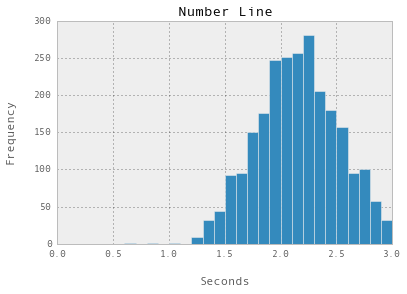

In [39]:
pd.options.display.mpl_style = 'default'
nline_no_miss['RT'].hist(bins=30, range=[0,3])
plt.ylim([0,300])
plt.title('Number Line')
plt.xlabel('Seconds', labelpad = 18)
plt.ylabel('Frequency', labelpad = 18)

## RTHold missed analysis

In [40]:
nline_miss = nline_df[['Error', 'RT', 'RTHold', 'catch', 'Task', 'Line_pct']]
nline_miss = nline_miss[nline_miss['catch']<1]
#len(nline_miss)

In [41]:
nline_miss['Missed'] = nline_miss['Error']
nline_miss['Missed'][nline_miss['Missed']<1] = 0
#nline_miss

/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [42]:
nline_miss['AbsError'] = np.abs(nline_miss['Error'])

In [43]:
position_missed = nline_miss.groupby(['Task', 'Line_pct'])
position_missed = position_missed['Missed']

In [44]:
responded = nline_miss[nline_miss['Missed']==0]
#responded['Error'] = np.abs(responded['Error'])
#len(responded)

In [45]:
nline_miss = nline_miss[nline_miss['Missed']==1]
#nline_miss

In [46]:
position_missed.sum()

Task  Line_pct
1     0.03        5
      0.07        5
      0.11        5
      0.21        4
      0.28        3
      0.33        3
      0.36        3
      0.45        1
      0.57        3
      0.60        0
      0.65        0
      0.74        4
      0.77        1
      0.85        5
      0.90        4
      0.98        1
2     0.03        6
      0.07        4
      0.11        2
      0.21        2
      0.28        2
      0.33        1
      0.36        1
      0.45        1
      0.57        0
      0.60        0
      0.65        0
      0.74        3
      0.77        0
      0.85        5
      0.90        0
      0.98        6
3     0.03        4
      0.07        5
      0.11        3
      0.21        1
      0.28        2
      0.33        2
      0.36        2
      0.45        2
      0.57        2
      0.60        3
      0.65        2
      0.74        4
      0.77        1
      0.85        3
      0.90        5
      0.98        7
Name: Missed, dtype: floa

In [47]:
missed_position = position_missed.sum()
pos_miss_1 = missed_position.iloc[0:16]
pos_miss_2 = missed_position.iloc[16:32]
pos_miss_3 = missed_position.iloc[32:48]
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
len(pos_miss_1)

16

([<matplotlib.axis.YTick at 0x10dde7450>,
 <a list of 5 Text yticklabel objects>)

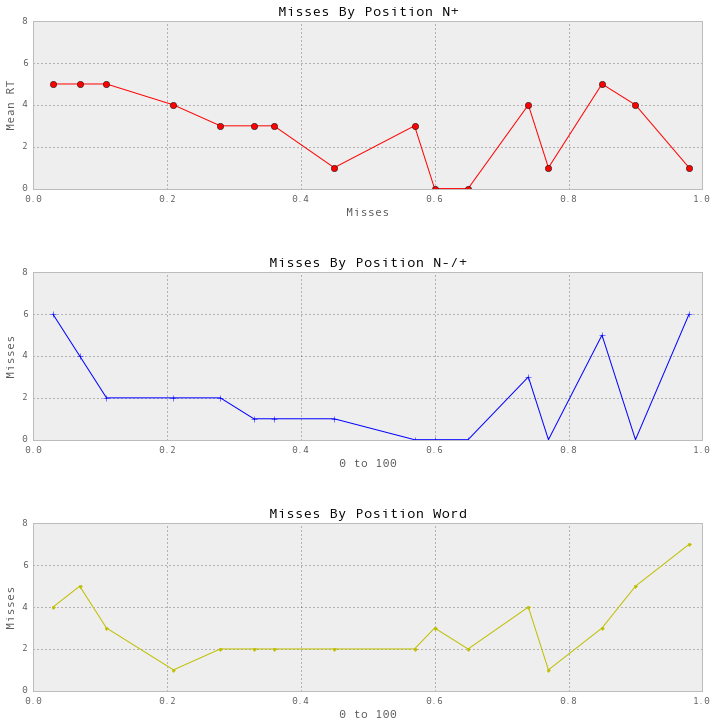

In [48]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, pos_miss_1, 'ro-')
plt.title('Misses By Position N+')
plt.xlabel('Misses', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([0,8])
plt.yticks(([0,2,4,6,8]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, pos_miss_2, 'b+-')
plt.title('Misses By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,8])
plt.yticks(([0,2,4,6,8]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, pos_miss_3, 'y.-')
plt.title('Misses By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,8])
plt.yticks(([0,2,4,6,8]))


##RTHold Subject Average

In [49]:
nline_miss_subj = nline_miss.groupby(level=0)
nline_miss_subj.mean()

,Error,RT,RTHold,catch,Task,Line_pct,Missed,AbsError
Subject,,,,,,,,
s_02003,1,-1,0.580029,0,2.428571,0.504286,1,1
s_02004,1,-1,0.371789,0,2.333333,0.513333,1,1
s_02005,1,-1,0.523442,0,1.882353,0.414118,1,1
s_02006,1,-1,0.318201,0,2.000000,0.315000,1,1
s_02007,1,-1,0.446265,0,1.000000,0.850000,1,1
s_02009,1,-1,0.596069,0,2.000000,0.070000,1,1
s_02010,1,-1,0.617966,0,2.142857,0.568571,1,1
s_02011,1,-1,0.586275,0,2.285714,0.555714,1,1
s_02014,1,-1,0.439934,0,2.000000,0.388571,1,1


##RTHold Overall Average

In [50]:
np.mean(nline_miss_subj.mean())

Error       1.000000
RT         -1.000000
RTHold      0.634727
catch       0.000000
Task        1.998491
Line_pct    0.467672
Missed      1.000000
AbsError    1.000000
dtype: float64

##Averages by subjected for responded trials

In [51]:
responded_subj = responded.groupby(level=0)
responded_subj.mean()

,Error,RT,RTHold,catch,Task,Line_pct,Missed,AbsError
Subject,,,,,,,,
s_02003,0.002544,2.240014,0.480898,0,1.978102,0.493212,0,0.022472
s_02004,0.000621,2.181841,0.390107,0,1.992908,0.493333,0,0.020997
s_02005,-0.004826,2.378822,0.468106,0,2.015748,0.504409,0,0.021902
s_02006,-0.000487,1.970216,0.422093,0,2.000000,0.496268,0,0.026771
s_02007,-0.009034,2.117213,0.430258,0,2.006993,0.491259,0,0.027687
s_02009,-0.003768,2.240575,0.499304,0,2.000000,0.496713,0,0.019800
s_02010,-0.003834,1.801020,0.402272,0,1.992701,0.489927,0,0.034298
s_02011,0.005220,2.177101,0.512704,0,1.985401,0.490584,0,0.031181
s_02014,0.000828,2.200079,0.485166,0,2.000000,0.499124,0,0.033909


##Overall Averages

In [52]:
np.mean(responded_subj.mean())

Error      -0.001894
RT          2.155551
RTHold      0.475796
catch       0.000000
Task        1.999762
Line_pct    0.493895
Missed      0.000000
AbsError    0.026046
dtype: float64

In [53]:
responded['RT_Diff'] = responded['RT']-responded['RTHold']

/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


##RT Differences is the new informaiton here

In [54]:
responded_subj = responded.groupby(level=0)
responded_subj.mean()

,Error,RT,RTHold,catch,Task,Line_pct,Missed,AbsError,RT_Diff
Subject,,,,,,,,,
s_02003,0.002544,2.240014,0.480898,0,1.978102,0.493212,0,0.022472,1.759116
s_02004,0.000621,2.181841,0.390107,0,1.992908,0.493333,0,0.020997,1.791734
s_02005,-0.004826,2.378822,0.468106,0,2.015748,0.504409,0,0.021902,1.910716
s_02006,-0.000487,1.970216,0.422093,0,2.000000,0.496268,0,0.026771,1.548123
s_02007,-0.009034,2.117213,0.430258,0,2.006993,0.491259,0,0.027687,1.686955
s_02009,-0.003768,2.240575,0.499304,0,2.000000,0.496713,0,0.019800,1.741271
s_02010,-0.003834,1.801020,0.402272,0,1.992701,0.489927,0,0.034298,1.398747
s_02011,0.005220,2.177101,0.512704,0,1.985401,0.490584,0,0.031181,1.664397
s_02014,0.000828,2.200079,0.485166,0,2.000000,0.499124,0,0.033909,1.714912


## Plots by position

In [55]:
position_tasks = responded.groupby(['Task', 'Line_pct'])

In [56]:
#responded.iloc[0:20]

##RTs by position averages

In [57]:
position_tasks['RT'].mean()

Task  Line_pct
1     0.03        2.166232
      0.07        2.252974
      0.11        2.251930
      0.21        2.236069
      0.28        2.250295
      0.33        2.102950
      0.36        2.194441
      0.45        1.835135
      0.57        1.943075
      0.60        1.965550
      0.65        2.005734
      0.74        2.181136
      0.77        2.239934
      0.85        2.345485
      0.90        2.307132
      0.98        2.210749
2     0.03        2.277682
      0.07        2.307971
      0.11        2.322347
      0.21        2.222244
      0.28        2.171832
      0.33        2.133167
      0.36        2.032535
      0.45        1.874872
      0.57        1.964878
      0.60        2.029661
      0.65        1.987113
      0.74        2.239032
      0.77        2.239711
      0.85        2.308307
      0.90        2.353920
      0.98        2.221245
3     0.03        2.283034
      0.07        2.322188
      0.11        2.307128
      0.21        2.249980
      0.28   

In [58]:
rts = position_tasks['RT'].mean()

In [59]:
error = position_tasks['AbsError'].mean()

In [60]:
#rts.iloc[10]

In [61]:
rts_1 = rts.iloc[0:16]
rts_2 = rts.iloc[16:32]
rts_3 = rts.iloc[32:48]
#rts_1 = rts.iloc[0:14]
#rts_2 = rts.iloc[14:30]
#rts_3 = rts.iloc[30:46]

In [62]:
error_1 = error.iloc[0:16]
error_2 = error.iloc[16:32]
error_3 = error.iloc[32:48]
#error_1 = error.iloc[0:14]
#error_2 = error.iloc[14:30]
#error_3 = error.iloc[30:46]

In [63]:
rts_1 = rts_1.get_values()
rts_2 = rts_2.get_values()
rts_3 = rts_3.get_values()

In [64]:
error_1 = error_1.get_values()
error_2 = error_2.get_values()
error_3 = error_3.get_values()

In [65]:
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
len(rts_1)
xvals1 = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.900, 0.980])

In [66]:
#len(rts_3)

([<matplotlib.axis.YTick at 0x1109c4dd0>,
 <a list of 3 Text yticklabel objects>)

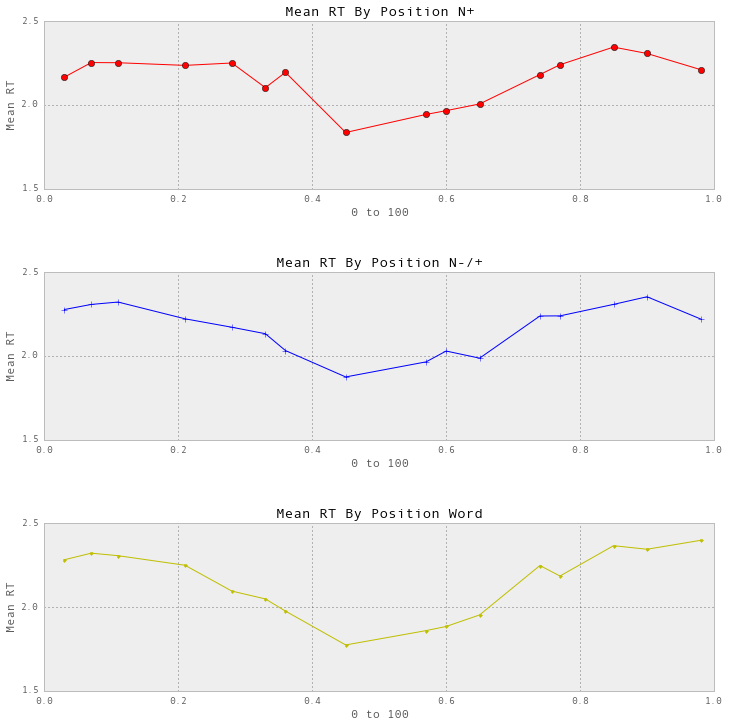

In [67]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, rts_1, 'ro-')
plt.title('Mean RT By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, rts_2, 'b+-')
plt.title('Mean RT By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, rts_3, 'y.-')
plt.title('Mean RT By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

#plt.subplots_adjust(hspace = 1.1)

([<matplotlib.axis.YTick at 0x110d7a090>,
 <a list of 4 Text yticklabel objects>)

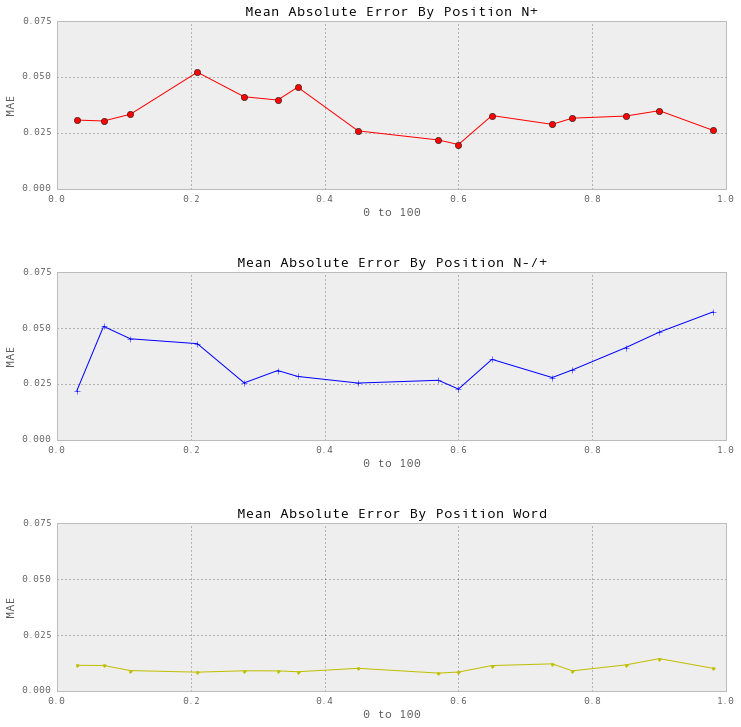

In [68]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1, 'ro-')
plt.title('Mean Absolute Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2, 'b+-')
plt.title('Mean Absolute Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3, 'y.-')
plt.title('Mean Absolute Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.075])
plt.yticks(([0.0,0.025,0.05,0.075]))


###Signed error is calculated as Response - Correct

In [69]:
signerror = position_tasks['Error'].mean()
STDsignerror = position_tasks['Error'].std()
signerror_1 = signerror.iloc[0:16]
signerror_2 = signerror.iloc[16:32]
signerror_3 = signerror.iloc[32:48]
STDsignerror_1 = STDsignerror.iloc[0:16]
STDsignerror_2 = STDsignerror.iloc[16:32]
STDsignerror_3 = STDsignerror.iloc[32:48]
signerror_1 = signerror_1.get_values()
signerror_2 = signerror_2.get_values()
signerror_3 = signerror_3.get_values()
STDsignerror_1 = STDsignerror_1.get_values()
STDsignerror_2 = STDsignerror_2.get_values()
STDsignerror_3 = STDsignerror_3.get_values()

([<matplotlib.axis.YTick at 0x110d643d0>,
 <a list of 5 Text yticklabel objects>)

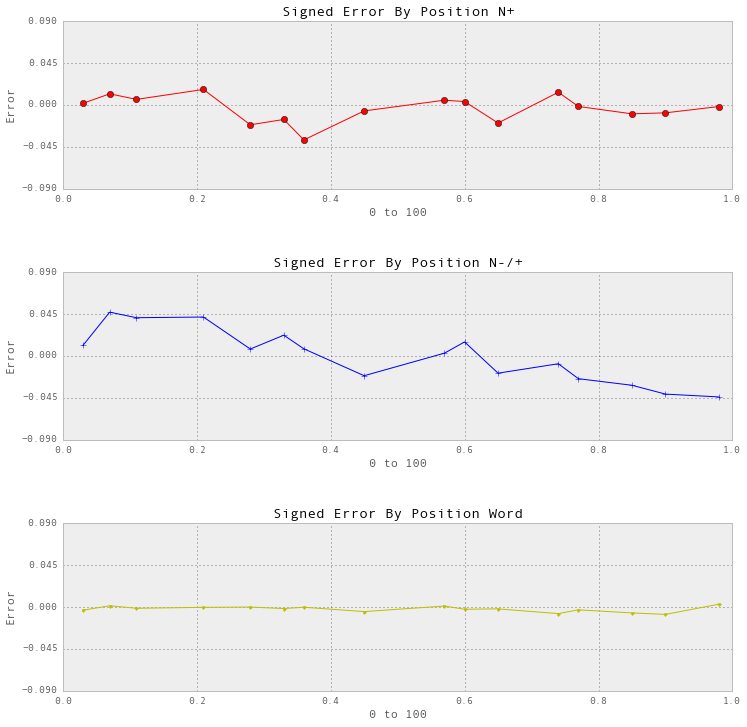

In [70]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, signerror_1, 'ro-')
plt.title('Signed Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, signerror_2, 'b+-')
plt.title('Signed Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, signerror_3, 'y.-')
plt.title('Signed Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

## Positive values in the graph above mean participant overestimated, negative values mean participant underestimated. In the -/+ task participants tend to give answers further from the endpoints than they should (This might have to do with the fact that the line is divided in 200 units unlike + task).

## SD calculated as SD of all data of a specific position

([<matplotlib.axis.YTick at 0x111903ad0>,
 <a list of 5 Text yticklabel objects>)

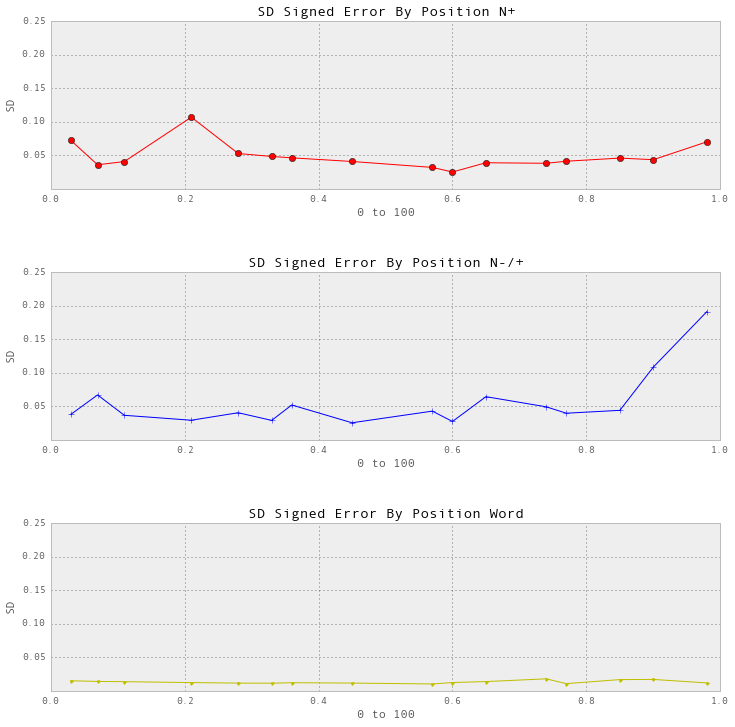

In [71]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, STDsignerror_1, 'ro-')
plt.title('SD Signed Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.25])
plt.yticks(([0.05,0.1,0.15,0.2,0.25]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, STDsignerror_2, 'b+-')
plt.title('SD Signed Error By Position N-/+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.25])
plt.yticks(([0.05,0.1,0.15,0.2,0.25]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, STDsignerror_3, 'y.-')
plt.title('SD Signed Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.25])
plt.yticks(([0.05,0.1,0.15,0.2,0.25]))

In [72]:
#Basis to extract SD for each subject and then conduct average across subjects
position_tasks.get_group((1,0.03)).loc['s_02009']['Error'].std()

0.010173573025367855

In [73]:
D = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = []
        D[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].std())

In [74]:
for task in D:
    print task
    for stim in D[task]:
        D[task][stim] = np.nanmean(D[task][stim])

1
2
3


In [75]:
STDsignerror_1 = []
STDsignerror_2 = []
STDsignerror_3 = []
for stim in D[1]:
    STDsignerror_1.append(D[1][stim])
for stim in D[2]:
    STDsignerror_2.append(D[2][stim])
for stim in D[3]:
    STDsignerror_3.append(D[3][stim])

## SD calculated as std of each subject and then averaging the individual std

###Only 3 datapoints per position per subject so estimate will have a lot of varriability

([<matplotlib.axis.YTick at 0x111d8ebd0>,
 <a list of 3 Text yticklabel objects>)

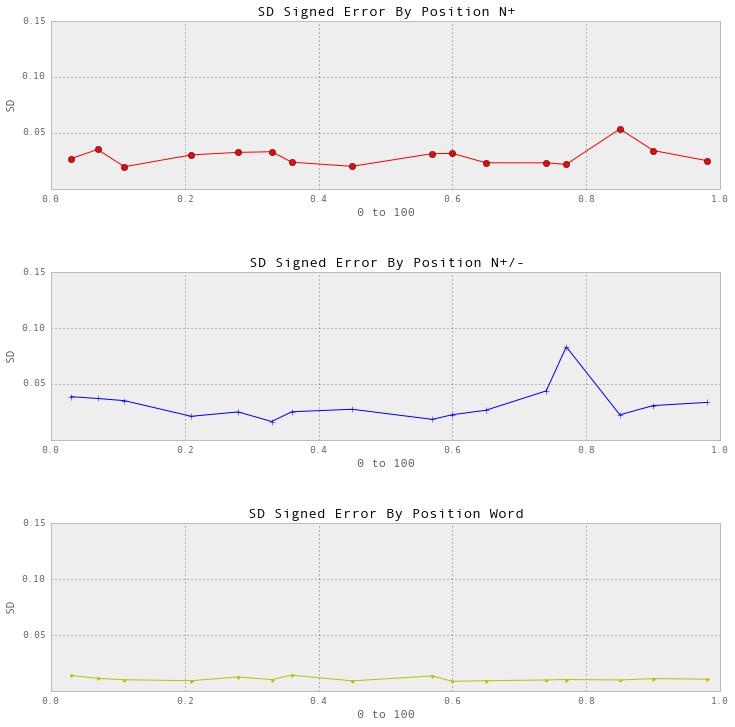

In [76]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, STDsignerror_1, 'ro-')
plt.title('SD Signed Error By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, STDsignerror_2, 'b+-')
plt.title('SD Signed Error By Position N+/-')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, STDsignerror_3, 'y.-')
plt.title('SD Signed Error By Position Word')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.15])
plt.yticks(([0.05,0.1,0.15]))

In [77]:
#For mean error as well can be calculated this way
D2 = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D2.get(task,0) == 0:
            D2[task] = {}
        if D2[task].get(stim,0) == 0:
            D2[task][stim] = []
        D2[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].mean())

##Correlate PAE Vs Landmark Distance

In [78]:
dist_0 = xvals
dist_0

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

In [79]:
dist_50 = abs(xvals-0.5)
dist_50

array([ 0.47,  0.43,  0.39,  0.29,  0.22,  0.17,  0.14,  0.05,  0.07,
        0.1 ,  0.15,  0.24,  0.27,  0.35,  0.4 ,  0.48])

In [80]:
dist_100 = abs(xvals - 1)
dist_100

array([ 0.97,  0.93,  0.89,  0.79,  0.72,  0.67,  0.64,  0.55,  0.43,
        0.4 ,  0.35,  0.26,  0.23,  0.15,  0.1 ,  0.02])

In [81]:
dist_Land = pd.DataFrame([dist_0, dist_50, dist_100]).min()
dist_Land

0     0.03
1     0.07
2     0.11
3     0.21
4     0.22
5     0.17
6     0.14
7     0.05
8     0.07
9     0.10
10    0.15
11    0.24
12    0.23
13    0.15
14    0.10
15    0.02
dtype: float64

([<matplotlib.axis.YTick at 0x11240de10>,
 <a list of 3 Text yticklabel objects>)

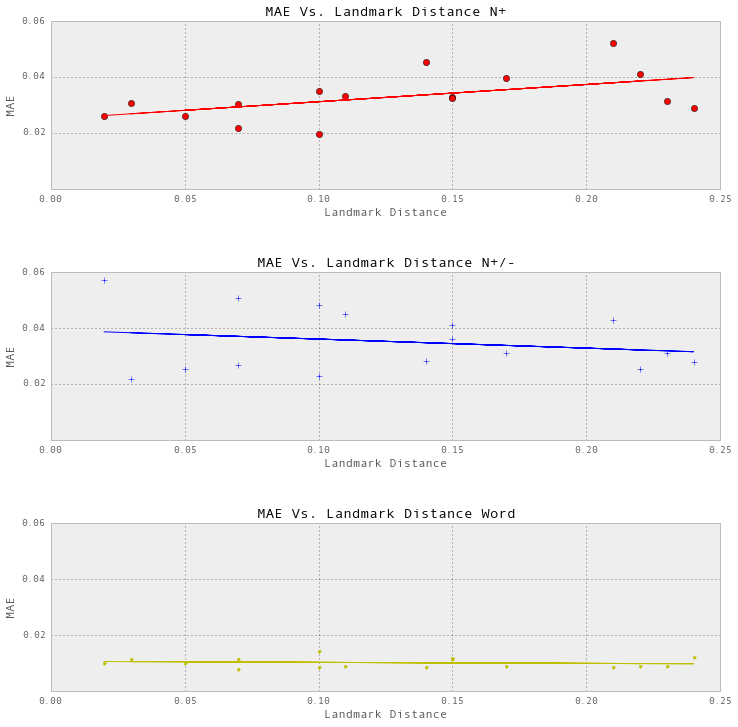

In [82]:
m1, b1 = np.polyfit(dist_Land,error_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, error_1, 'ro')
plt.plot(dist_Land, m1*dist_Land + b1, 'r-')
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land,error_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, error_2, 'b+')
plt.plot(dist_Land, m2*dist_Land + b2, 'b-')
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land,error_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, error_3, 'y.')
plt.plot(dist_Land, m3*dist_Land + b3, 'y-')
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

In [83]:
print m1, m2, m3

0.0618041320055 -0.0324222813047 -0.00362806718054


In [84]:
from scipy.stats import linregress
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,error_1)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land,error_2)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land,error_3)

In [85]:
print 'r1', r1
print 'r2', r2
print 'r3', r3

r1 0.524771406064
r2 -0.210298450387
r3 -0.145689184758


In [86]:
print 'r1sq', r1*r1
print 'r2sq', r2*r2
print 'r3sq', r3*r3

r1sq 0.275385028623
r2sq 0.0442254382351
r3sq 0.0212253385554


In [87]:
print 'slope1', slope1
print 'slope2', slope2
print 'slope3', slope3

slope1 0.0618041320055
slope2 -0.0324222813047
slope3 -0.00362806718054


In [88]:
print 'p1', p1
print 'p2', p2
print 'p3', p3

p1 0.0368825437045
p2 0.434354810333
p3 0.590320551269


##First half only

([<matplotlib.axis.YTick at 0x112e819d0>,
 <a list of 3 Text yticklabel objects>)

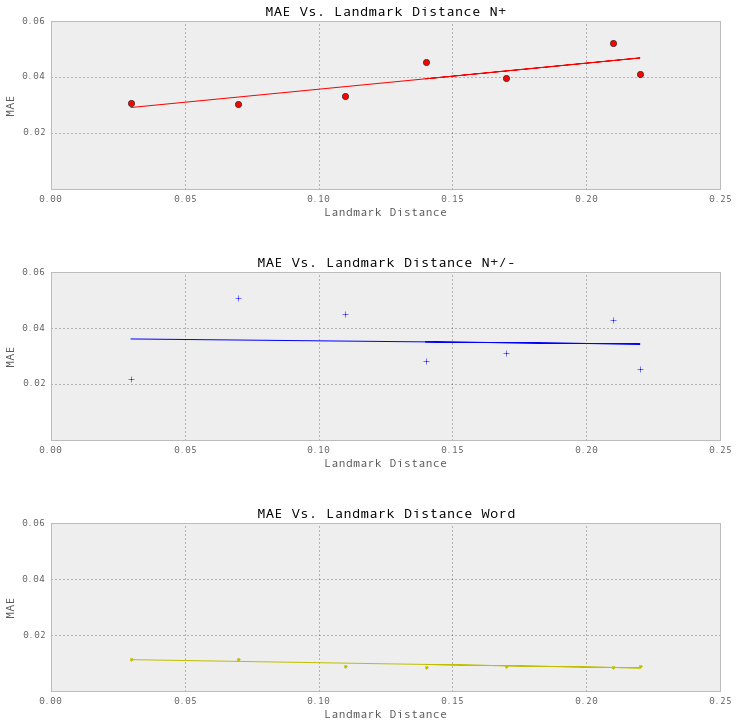

In [89]:
m1, b1 = np.polyfit(dist_Land[0:7],error_1[0:7],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land[0:7], error_1[0:7], 'ro')
plt.plot(dist_Land[0:7], m1*dist_Land[0:7] + b1, 'r-')
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land[0:7],error_2[0:7],1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land[0:7], error_2[0:7], 'b+')
plt.plot(dist_Land[0:7], m2*dist_Land[0:7] + b2, 'b-')
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land[0:7],error_3[0:7],1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land[0:7], error_3[0:7], 'y.')
plt.plot(dist_Land[0:7], m3*dist_Land[0:7] + b3, 'y-')
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

##Second half only

([<matplotlib.axis.YTick at 0x113cb7fd0>,
 <a list of 3 Text yticklabel objects>)

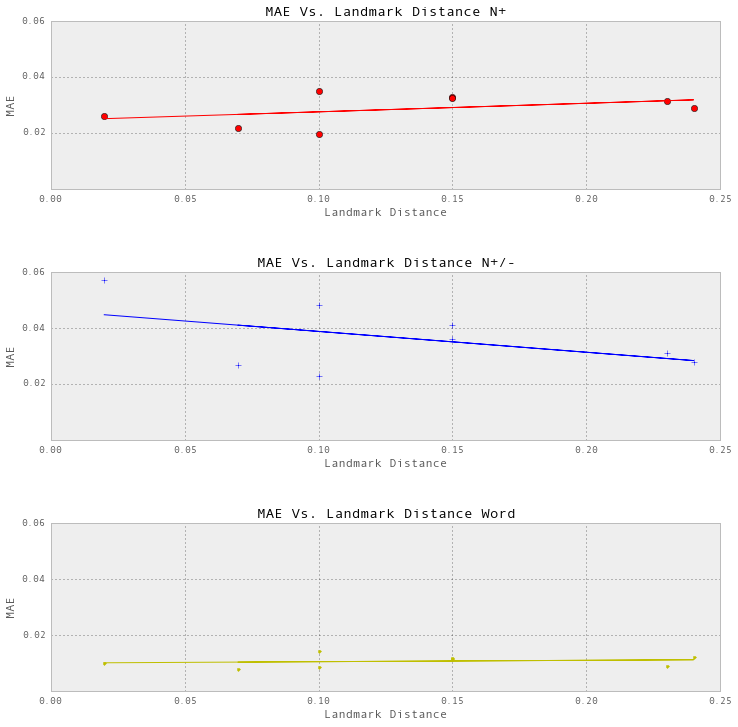

In [90]:
m1, b1 = np.polyfit(dist_Land[8:],error_1[8:],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land[8:], error_1[8:], 'ro')
plt.plot(dist_Land[8:], m1*dist_Land[8:] + b1, 'r-')
plt.title('MAE Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land[8:],error_2[8:],1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land[8:], error_2[8:], 'b+')
plt.plot(dist_Land[8:], m2*dist_Land[8:] + b2, 'b-')
plt.title('MAE Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land[8:],error_3[8:],1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land[8:], error_3[8:], 'y.')
plt.plot(dist_Land[8:], m3*dist_Land[8:] + b3, 'y-')
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

## Landmark distance Vs signed error

([<matplotlib.axis.YTick at 0x113888f90>,
 <a list of 3 Text yticklabel objects>)

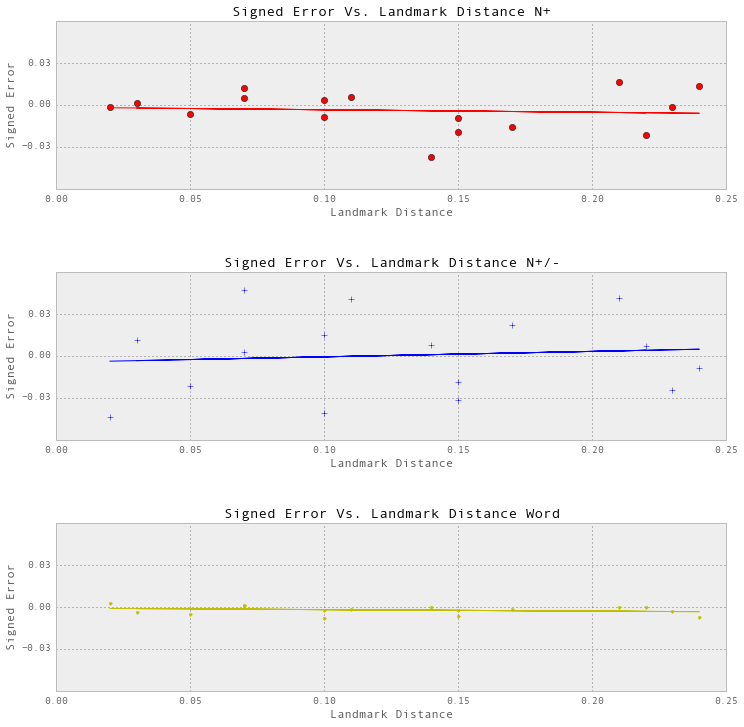

In [91]:
m1, b1 = np.polyfit(dist_Land,signerror_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, signerror_1, 'ro')
plt.plot(dist_Land, m1*dist_Land + b1, 'r-')
plt.title('Signed Error Vs. Landmark Distance N+')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

m2, b2 = np.polyfit(dist_Land,signerror_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, signerror_2, 'b+')
plt.plot(dist_Land, m2*dist_Land + b2, 'b-')
plt.title('Signed Error Vs. Landmark Distance N+/-')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

m3, b3 = np.polyfit(dist_Land,signerror_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, signerror_3, 'y.')
plt.plot(dist_Land, m3*dist_Land + b3, 'y-')
plt.title('Signed Error Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('Signed Error')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.03,0.,0.03]))

## Estimation slope vs arithmetic scores

In [92]:
nline_df.to_csv('nline_data.csv', sep='\t')

In [93]:
new_df = pd.read_csv('nline_data.csv',sep='\t')

In [94]:
new_df.loc[:,:]= new_df[new_df['catch']<1]
#len(nline_miss)
new_df['Missed'] = new_df['Error']
new_df.loc[new_df['Missed']<1,'Missed'] = 0
#Pick only responded trials
new_df.loc[:,:] = new_df[new_df['Missed']==0]

In [112]:
new_df = new_df[pd.notnull(new_df['Subject'])]

In [114]:
group_task = new_df.groupby(['Subject','Task','Line_pct'])

In [115]:
#group_task.groups

In [116]:
group_task.get_group(('s_02003',1,0.98))['Error'].mean()

0.02

In [117]:
error = group_task['Error'].mean()
response = group_task['Response'].mean()

In [118]:
error.loc['s_02003'].loc[1]

Line_pct
0.03   -0.024126
0.07    0.017004
0.11   -0.013084
0.21   -0.038194
0.28   -0.044317
0.33   -0.063480
0.36   -0.093480
0.45    0.034581
0.57   -0.014934
0.60    0.027753
0.65   -0.013436
0.74    0.059559
0.77    0.053789
0.85    0.015639
0.90    0.027313
0.98    0.020000
Name: Error, dtype: float64

In [119]:
response.loc['s_02003'].loc[1]

Line_pct
0.03    0.005874
0.07    0.087004
0.11    0.096916
0.21    0.171806
0.28    0.235683
0.33    0.266520
0.36    0.266520
0.45    0.484581
0.57    0.555066
0.60    0.627753
0.65    0.636564
0.74    0.799559
0.77    0.823789
0.85    0.865639
0.90    0.927313
0.98    1.000000
Name: Response, dtype: float64

In [120]:
subjs = new_df['Subject'].unique()
tasks = new_df['Task'].unique()


In [122]:

error_dict = {}
position_dict = {}
results_list = []
for s in subjs:
    error_dict[s] = {}
    position_dict[s] = {}
    for t in tasks:
        d_tmp = {}
        error_dict[s][t] = error.loc[s].loc[t]
        position_dict[s][t] = response.loc[s].loc[t]
        slope,inter,r,p,stderr = linregress(error_dict[s][t].index, error_dict[s][t])
        slope2,inter2,r2,p2,stderr2 = linregress(position_dict[s][t].index, position_dict[s][t])
        d_tmp = {'Subject':s, 'Task':t, 'slope_E':slope, 'slope_P':slope2, 'int_E':inter,
                 'int_P':inter2,'r_E':r, 'r_P':r2, 'p_E':p, 'p_P':p2, 'stderr_E':stderr,
                 'stderr_P':stderr2, 'R2_E':r*r, 'R2_P':r2*r2}
        results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)
        
        

In [123]:
slope1, intercept1, r1, p1, stderr1 = linregress(position_dict['s_02003'][3].index,
                                                 position_dict['s_02003'][3])

(0, 1)

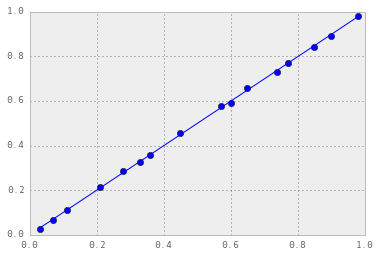

In [124]:
plt.plot(position_dict['s_02003'][3].index, position_dict['s_02003'][3], 'bo')
plt.plot(position_dict['s_02003'][3].index, slope1*position_dict['s_02003'][3].index + intercept1, 'b-')
plt.ylim([0,1])

In [125]:
print slope1, intercept1, r1, r1*r1, p1, stderr1

0.996360678626 0.000475329025273 0.999811119614 0.999622274905 2.29842320248e-25 0.0051763367167


In [126]:
#res_df

In [127]:
res_grp = res_df.groupby(['Subject','Task'])

In [128]:
res_df['slope_P'][res_df['Task']==1].mean()

0.9924712470177669

In [129]:
res_df[['Subject','slope_P']][res_df['Task']==1]

,Subject,slope_P
2,s_02009,1.012346
5,s_02003,1.074796
8,s_02007,1.000100
11,s_02006,0.974858
14,s_02005,1.009043
17,s_02004,0.960685
20,s_02018,1.009683
23,s_02010,1.078028
26,s_02011,0.902250
29,s_02014,1.005336


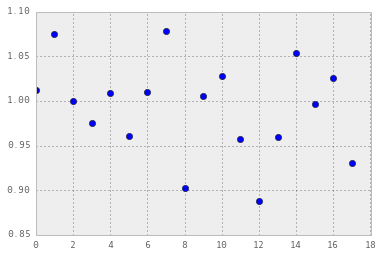

In [130]:
plt.plot(res_df['slope_P'][res_df['Task']==1], 'bo')

In [131]:
res_df['slope_P'][res_df['Task']==1].describe()

count    18.000000
mean      0.992471
std       0.053148
min       0.887722
25%       0.959653
50%       1.002718
75%       1.022360
max       1.078028
Name: slope_P, dtype: float64

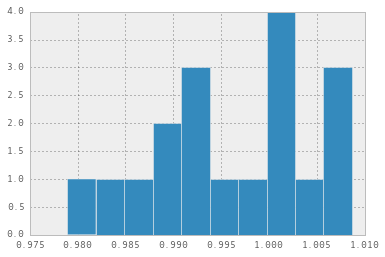

In [132]:
res_df['slope_P'][res_df['Task']==3].hist()

In [133]:
math = pd.read_csv('Math_Results.csv')

In [134]:
res_df = pd.merge(res_df,math,on='Subject',how='inner')

In [135]:
res_df[['Subject','slope_P', 'Math_Score']][res_df['Task']==1]

,Subject,slope_P,Math_Score
2,s_02009,1.012346,14
5,s_02003,1.074796,8
8,s_02007,1.000100,17
11,s_02006,0.974858,18
14,s_02005,1.009043,9
17,s_02004,0.960685,13
20,s_02018,1.009683,19
23,s_02010,1.078028,10
26,s_02011,0.902250,13
29,s_02014,1.005336,14


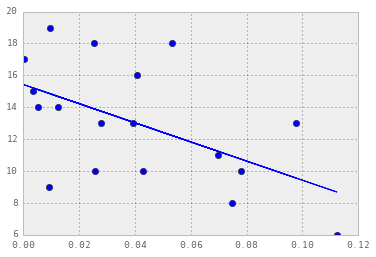

In [136]:
slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_E'][res_df['Task']==1]),
                                                 res_df['Math_Score'][res_df['Task']==1])
plt.plot(abs(res_df['slope_E'][res_df['Task']==1]),res_df['Math_Score'][res_df['Task']==1], 'bo')
plt.plot(abs(res_df['slope_E'][res_df['Task']==1]), slope1*abs(res_df['slope_E'][res_df['Task']==1]) + intercept1, 'b-')

In [137]:
print r1, r1*r1, p

-0.544994387158 0.297018882033 0.0251983162874


([<matplotlib.axis.YTick at 0x117f92610>,
 <a list of 4 Text yticklabel objects>)

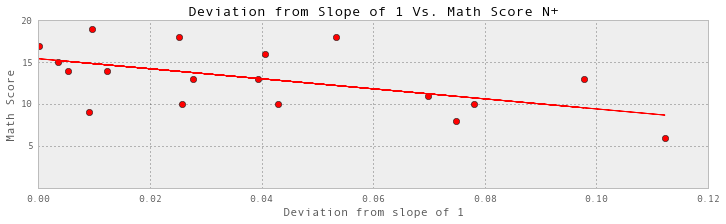

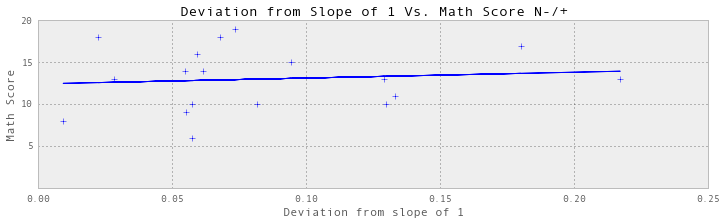

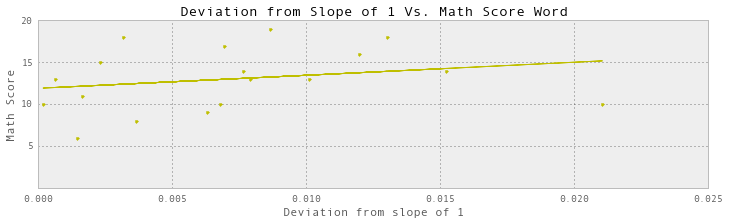

In [145]:
m1, b1 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==1] -1),
                    res_df['Math_Score'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==1] -1),
          res_df['Math_Score'][res_df['Task']==1], 'ro')
plt.plot(abs(res_df['slope_P'][res_df['Task']==1] -1), 
         m1*abs(res_df['slope_P'][res_df['Task']==1] -1) + b1, 'r-')
plt.title('Deviation from Slope of 1 Vs. Math Score N+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==2] -1),
                    res_df['Math_Score'][res_df['Task']==2],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==2] -1),
          res_df['Math_Score'][res_df['Task']==2], 'b+')
plt.plot(abs(res_df['slope_P'][res_df['Task']==2] -1), 
         m2*abs(res_df['slope_P'][res_df['Task']==2] -1) + b2, 'b-')
plt.title('Deviation from Slope of 1 Vs. Math Score N-/+')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m3, b3 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==3] -1),
                    res_df['Math_Score'][res_df['Task']==3],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==3] -1),
          res_df['Math_Score'][res_df['Task']==3], 'y.')
plt.plot(abs(res_df['slope_P'][res_df['Task']==3] -1), 
         m3*abs(res_df['slope_P'][res_df['Task']==3] -1) + b3, 'y-')
plt.title('Deviation from Slope of 1 Vs. Math Score Word')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

In [150]:
slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_P'][res_df['Task']==1]-1),
                                                 res_df['Math_Score'][res_df['Task']==1])
slope2, intercept2, r2, p2, stderr2 = linregress(abs(res_df['slope_P'][res_df['Task']==2]-1),
                                                 res_df['Math_Score'][res_df['Task']==2])
slope3, intercept3, r3, p3, stderr3 = linregress(abs(res_df['slope_P'][res_df['Task']==3]-1),
                                                 res_df['Math_Score'][res_df['Task']==3])

In [151]:
print r1, r2, r3

-0.544994387157 0.101716770176 0.23332680009


In [152]:
print r1*r1, r2*r2, r3*r3

0.297018882033 0.010346301335 0.0544413956404


In [153]:
print slope1, slope2, slope3

-59.9976760937 6.96651954134 155.642765904


In [154]:
print p1, p2, p3

0.0193391995445 0.687970493569 0.351437030905
